# AIPI 590 - XAI | Assignment #06
### Description
### Your Name: Wilson Tseng

#### Assignment 6 - Explainable Techniques II:
[GitHub Link](https://github.com/smilewilson1999/XAI/tree/84fd6d65d674d198f80e6197273b1fb01df0fe74/Assignment%203%20-%20Interpretable%20ML)


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/smilewilson1999/XAI/blob/main/Assignment%203%20-%20Interpretable%20ML/Interpretable_ML_Test.ipynb)

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI" # Change to your repo name
git_path = 'https://github.com/smilewilson1999/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment 6 - Explainable Techniques II'
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"
%ls

In [22]:
# Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from pygam import LogisticGAM, s, f, l

In [23]:
# Load the dataset
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset to confirm successful loading
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Linear Regression

In this section, I will treat the churn variable as a continuous variable (0 for staying, 1 for churning) and build a linear regression model. I will interpret the coefficients and assess the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.

In [24]:
# Ensure 'TotalCharges', 'MonthlyCharges', and 'tenure' are numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric, set invalid values to NaN
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')  # Ensure MonthlyCharges is numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')  # Ensure tenure is numeric

# Fill missing values if any
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
df['tenure'].fillna(df['tenure'].median(), inplace=True)

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define the features (X) and target (y)
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]  # Numerical features
y = df['Churn']  # Treat churn as continuous (0: stay, 1: churn)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the linear regression model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R-squared: {r2}')

# Interpret the coefficients
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print('Coefficients:\n', coefficients)

Linear Regression MSE: 0.1440307044751866
Linear Regression R-squared: 0.26003959078740957
Coefficients:
                 Coefficient
tenure            -0.002786
MonthlyCharges     0.006946
TotalCharges      -0.000073



## 2. Logistic Regression

I will use logistic regression to predict churn since the churn variable is binary (0 for staying, 1 for churning). I will interpret the model's coefficients and evaluate its performance using appropriate classification metrics.
    


## Exploratory Data Analysis (EDA)

I will first perform some exploratory data analysis (EDA) to understand the relationships between different features and the target variable (churn). This will help us determine the assumptions for linear, logistic, and generalized additive models.

I will use various visualizations and statistical methods to check for relationships and patterns.
    

Accuracy: 0.7863733144073811
AUC: 0.819521359735837
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.60      0.56      0.58       373

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[898 138]
 [163 210]]


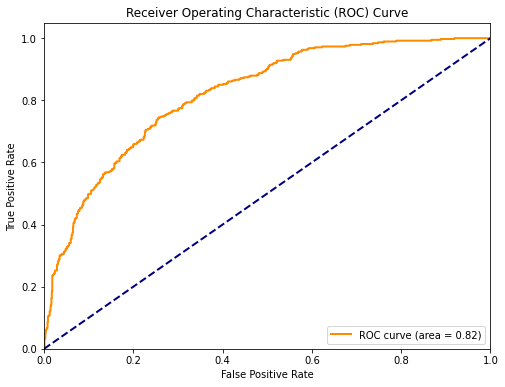

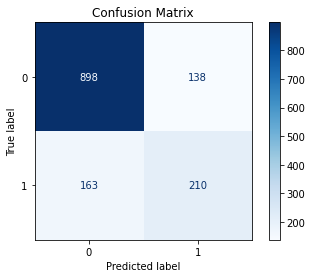

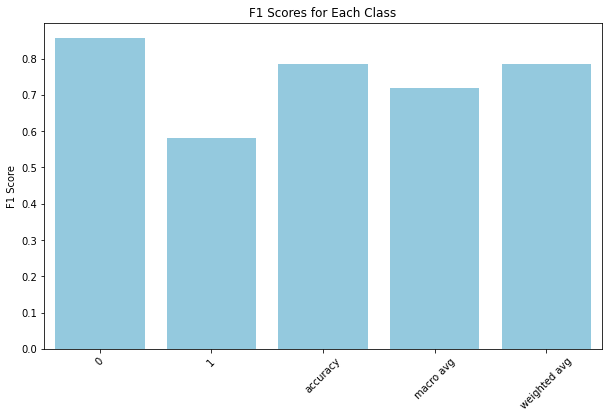

"\n1. ROC Curve: Used to show the model's classification ability. The closer the area under the curve (AUC) is to 1, the better the model's performance.\n2. Confusion Matrix: A visual display of the correct and incorrect data classification results predicted by the model.\n3. Bar Chart of Classification Report: A bar chart of the F1 scores for each category, showing how well the model performs in each category.\n"

In [25]:
# Build the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_reg_model.predict(X_test)
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Evaluate the model using classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot Classification Report as a Bar Chart
report = classification_report(y_test, y_pred_log, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.barplot(x=df_report.index, y=df_report['f1-score'], color="skyblue")
plt.title("F1 Scores for Each Class")
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

"""
1. ROC Curve: Used to show the model's classification ability. The closer the area under the curve (AUC) is to 1, the better the model's performance.
2. Confusion Matrix: A visual display of the correct and incorrect data classification results predicted by the model.
3. Bar Chart of Classification Report: A bar chart of the F1 scores for each category, showing how well the model performs in each category.
"""


I will use logistic regression to predict churn since the churn variable is binary (0 for staying, 1 for churning). I will interpret the model's coefficients and evaluate its performance using appropriate classification metrics.
    

In [31]:
# Define features and target variable
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Feature scaling
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Prepare features and target variable
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

# Check the distribution of the target variable
print("\nOriginal class distribution:")
print(y.value_counts())

# Split the data into training and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check the distribution in the training set
print("\nTraining set class distribution:")
print(y_train.value_counts())

# Check the distribution in the test set
print("\nTest set class distribution:")
print(y_test.value_counts())

# Initialize the logistic regression model with class_weight='balanced'
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("\nBest parameters found:", grid_search.best_params_)

# Use the best estimator from GridSearchCV
best_log_reg_model = grid_search.best_estimator_

# Predict on the test set
y_pred_log = best_log_reg_model.predict(X_test)
y_pred_proba = best_log_reg_model.predict_proba(X_test)[:, 1]

# Evaluate the model using classification metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Original class distribution:
0    5174
1    1869
Name: Churn, dtype: int64

Training set class distribution:
0    4139
1    1495
Name: Churn, dtype: int64

Test set class distribution:
0    1035
1     374
Name: Churn, dtype: int64

Best parameters found: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy: 0.7381121362668559
AUC: 0.8402542044485779

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Confusion Matrix:
 [[748 287]
 [ 82 292]]


Next, I will treat churn as a binary variable and build a logistic regression model to predict the probability of churn. I will interpret the coefficients and use appropriate metrics to evaluate the model's performance.
    

In [33]:
# Build the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]
y_pred_log = log_reg_model.predict(X_test)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred_log)

print("Logistic Regression AUC:", roc_auc)
print("Logistic Regression Accuracy:", accuracy)

# Coefficients interpretation
log_coefficients = pd.DataFrame(log_reg_model.coef_[0], X.columns, columns=['Coefficient'])
print("Logistic Regression Coefficients: \n", log_coefficients)


Logistic Regression AUC: 0.8419979849647369
Logistic Regression Accuracy: 0.8055358410220014
Logistic Regression Coefficients: 
                                        Coefficient
tenure                                   -1.239793
MonthlyCharges                           -0.495779
TotalCharges                              0.509188
gender_Male                               0.021771
SeniorCitizen_1                           0.146006
Partner_Yes                               0.020953
Dependents_Yes                           -0.226059
PhoneService_Yes                         -0.113063
MultipleLines_No phone service            0.115419
MultipleLines_Yes                         0.367838
InternetService_Fiber optic               1.207241
InternetService_No                       -0.176330
OnlineSecurity_No internet service       -0.176330
OnlineSecurity_Yes                       -0.343530
OnlineBackup_No internet service         -0.176330
OnlineBackup_Yes                         -0.093716
Devi

## PDP

In [34]:
from sklearn.inspection import PartialDependenceDisplay

In [35]:
# Plot PDP
selected_features = [0, 1, 2] # Using 'tenure', 'MonthlyCharges', and 'TotalCharges'

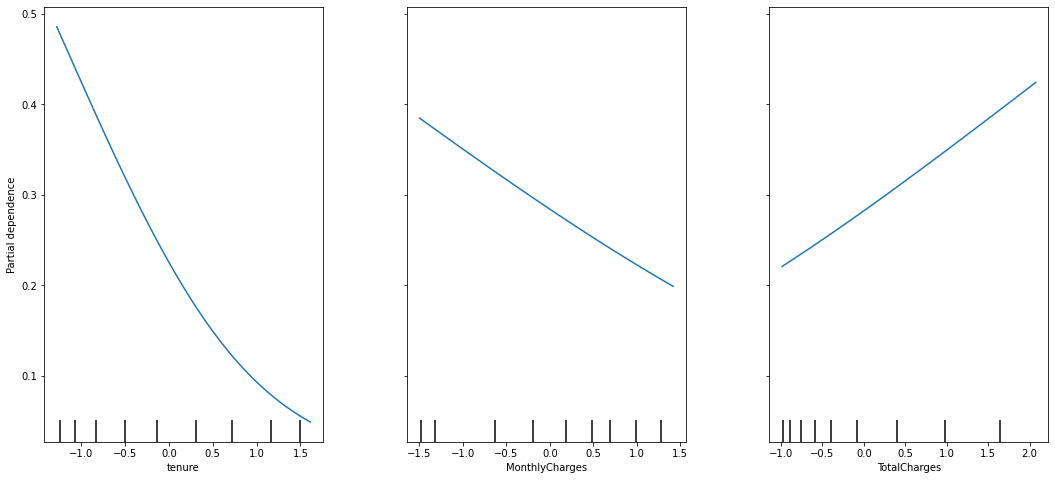

In [36]:
# Create PDP plots
display_PDP = PartialDependenceDisplay.from_estimator(
    log_reg_model,  # Use the logistic regression model
    X_train,  # Original (pre-encoded) features
    features=selected_features,
    feature_names=['tenure', 'MonthlyCharges', 'TotalCharges'],  # Specify feature names
    grid_resolution=50,
    n_cols=3
)

display_PDP.figure_.set_size_inches(18, 8)
display_PDP.figure_.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

## ICE (Individual Conditional Expectation)

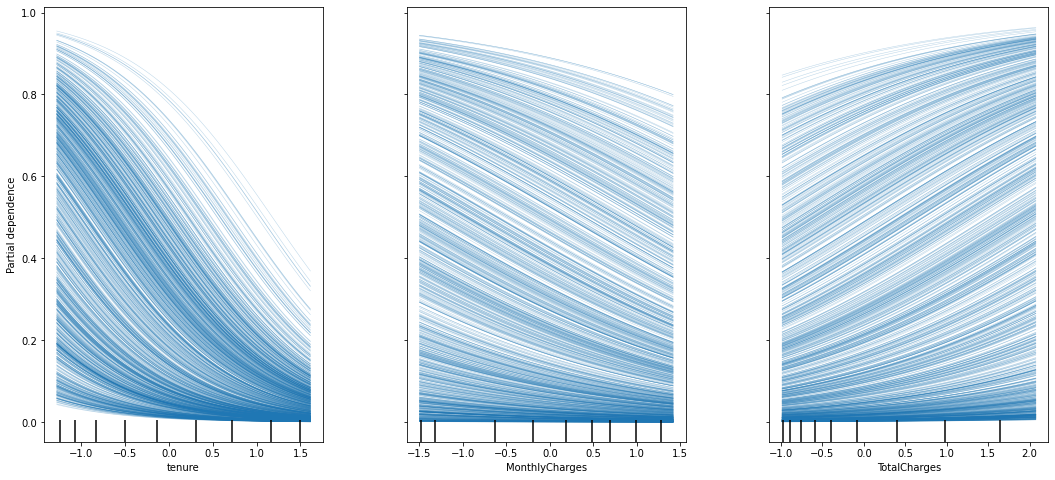

In [37]:
# Plot ICE
display_ICE = PartialDependenceDisplay.from_estimator(
    log_reg_model,
    X_train,
    features=selected_features,
    feature_names=['tenure', 'MonthlyCharges', 'TotalCharges'],
    grid_resolution=50,
    kind="individual",  # Set kind to 'individual' for ICE lines
    n_cols=3
)

display_ICE.figure_.set_size_inches(18, 8)
display_ICE.figure_.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

## ALE

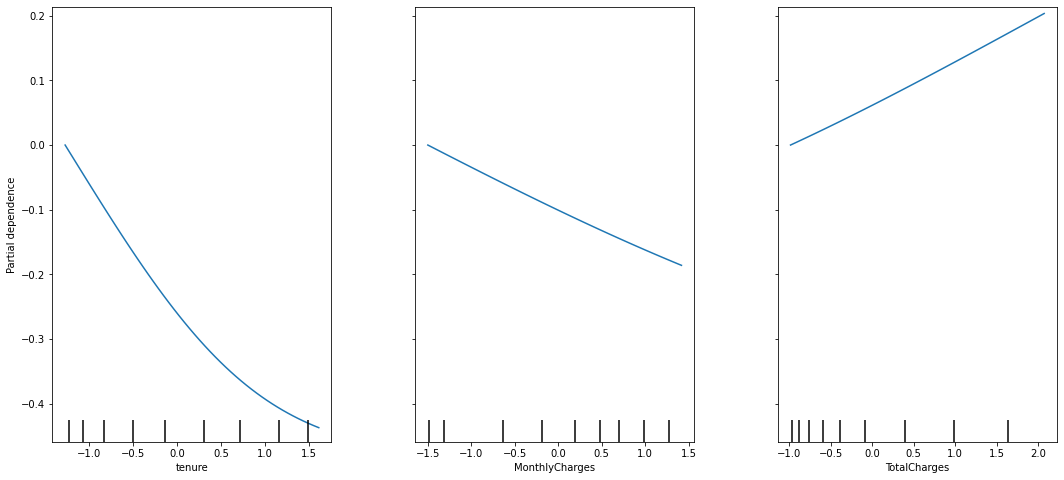

In [38]:
# Plot ALE
display_ALE = PartialDependenceDisplay.from_estimator(
    log_reg_model,
    X_train,
    features=selected_features,
    feature_names=['tenure', 'MonthlyCharges', 'TotalCharges'],
    grid_resolution=50,
    kind="average",  # Set kind to average for ALE-like behavior
    centered=True,  # This approximates ALE
    n_cols=3
)

display_ALE.figure_.set_size_inches(18, 8)
display_ALE.figure_.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

## What I found in these figures

**PDP** -> Overall Impact of Characteristics on Model Predictions (Due to avg.)

- **Tenure:** The PDP shows a negative correlation between Tenure and the target variable, with the model predicting progressively smaller variables as Tenure increases. This may indicate that customers with longer Tenure are less likely to Churn.
- **MonthlyCharges**: The monthly fee is negatively correlated with the target variable, indicating that an increase in the monthly fee decreases the value.
- **TotalCharges**: The PDP shows a positive correlation between TotalCharges and target variables, with the model predicted variables increasing as TotalCharges increases, indicating that customers with high TotalCharges are more likely to experience Churn.

**ICE** -> Individual effects of each sample

ICE shows the individual impact of each feature on the model:

- **Tenure**: The lines for most individuals show a decreasing trend, which is consistent with the overall trend in the PDP, suggesting that the majority of samples have a decreasing predicted Churn risk as Tenure increases.
- The lines for "MonthlyCharges" and "TotalCharges" show the differences between individuals, and although the overall trends are similar, the degree of influence varies across samples.

**ALE** -> Effects of Localized Changes (Within the range of different values)

The ALE plots show the localized effects of each feature.

- **Tenure**: Same as PDP and ICE, showing negative imapact
- The trends for "MonthlyCharges" and "TotalCharges" are similar to the PDP plots, but the ALE plots are more focused on the local effects of features rather than the global trend.

- Citation: Debug with Cline (Using API with DeepSeek)